In [100]:
import numpy as np
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib
import json, math
from operator import sub
import polars as pl
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

In [101]:
v = 615
n = 400
q = 200
i0 = 120
num_runs = 1


min_hops = 1
bins = np.arange(min_hops - 0.5, 100, 1)

In [102]:
def get_single_num_receivers_by_hop(r, mg = 1000, pL = 0):
    run_df = pl.read_csv(f'../res/v{v}/rdf_n{n}_i{i0}_q{q}_mg{mg}_pL{pL}_r{r}.csv')
    received_events = run_df.filter((pl.col('numHops') > 0) & (pl.col('eventType') == 'PktRcvd'))
    forwarded_events = run_df.filter((pl.col('numHops') > 0) & (pl.col('eventType') == 'PktFwd'))

    num_hops_rcvd = received_events['numHops'].to_numpy()
    num_hops_fwd = forwarded_events['numHops'].to_numpy()
    bin_centers = (bins[1:] + bins[0:-1]) / 2

    num_rcvd, _ = np.histogram(num_hops_rcvd, bins)
    num_fwd, _ = np.histogram(num_hops_fwd, bins)

    return num_rcvd / num_fwd

def get_single_num_receivers(r, mg = 1000, pL = 0):
    run_df = pl.read_csv(f'../res/v{v}/rdf_n{n}_i{i0}_q{q}_mg{mg}_pL{pL}_r{r}.csv')
    received_events = run_df.filter((pl.col('numHops') > 0) & (pl.col('eventType') == 'PktRcvd'))
    forwarded_events = run_df.filter((pl.col('numHops') > 0) & (pl.col('eventType') == 'PktFwd'))
    return len(received_events) / len(forwarded_events)

def get_num_receivers_by_hop(mg = 1000, pL = 0):
    num_receivers = np.zeros(len(bins)-1)
    for r in range(num_runs):
        num_receivers += get_single_num_receivers_by_hop(r, mg, pL)

    return num_receivers / num_runs

def get_num_receivers(mg = 1000, pL = 0):
    num_receivers = 0
    for r in range(num_runs):
        num_receivers += get_single_num_receivers(r, mg, pL)

    return num_receivers / num_runs

def get_num_messages_received(mg = 1000, pL = 0):
    n_rcvd = []
    for r in range(num_runs):
        run_df = pl.read_csv(f'../res/v{v}/rdf_n{n}_i{i0}_q{q}_mg{mg}_pL{pL}_r{r}.csv')
        received_events = run_df.filter((pl.col('eventType') == 'PktRcvd'))
        n_rcvd.append(len(received_events))

    return np.mean(n_rcvd)



In [103]:
rdf_color = '#f03a34'#'#7eb0d5'
rdf_nc_color_1 = '#2e9dd6' #fd7f6f'
rdf_nc_color_2 = '#23a67a'#'#ffa92f'

/tmp/ipykernel_158628/1658752089.py:13: RuntimeWarning: invalid value encountered in divide
  return num_rcvd / num_fwd


FileNotFoundError: No such file or directory: ../res/v615/rdf_n400_i120_q200_mg0_pL32_r0.csv

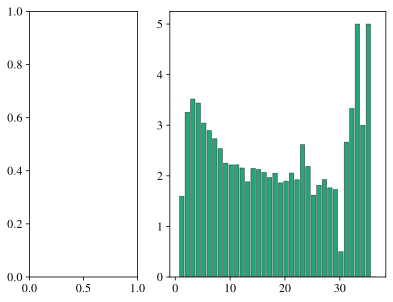

In [104]:
fig, [ax2, ax] = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 2]})
bin_centers = (bins[1:] + bins[0:-1]) / 2

bar_offset = 0.2

num_receivers = get_num_receivers_by_hop(0, 200)
ax.bar(bin_centers + bar_offset, num_receivers, label="NC-RDF-B", color=rdf_nc_color_2, lw=0.5, ec="#333")

num_receivers = get_num_receivers_by_hop(0, 32)
ax.bar(bin_centers, num_receivers, label="NC-RDF ($p_e = 0.32$)", color=rdf_nc_color_1, lw=0.5, ec="#333")

num_receivers = get_num_receivers_by_hop(1000, 0)
ax.bar(bin_centers - bar_offset, num_receivers, label="RDF", color=rdf_color, lw=0.5, ec="#333")

# ax.plot([0,50],[avg_receivers_rdf, avg_receivers_rdf], color="#333")
# ax.plot([0,50],[avg_receivers_nc_rdf, avg_receivers_nc_rdf], '-.', color="#333")

# ax.plot(bin_centers, (num_rcvd_nc_rdf / num_fwd_nc_rdf) - (num_rcvd_rdf / num_fwd_rdf), ':', color="#333", label="Difference")

ax.set_ylim([0, 6])
ax.set_xlim([0, 35])
# {np.mean(gains_NC[gains_NC > 0]):.2f}
ax2.set_ylabel('Avg. \# Receivers')
ax.set_xlabel('\# Hops $h$')

ax2.set_title(f'Avg \# Receivers')
ax.set_title(f'Avg \# Receivers by Hop ($N = {n}$)')

# ax.hist(num_hops_rcvd_nc_rdf, bins=, alpha=0.8, label="NC-RDF")
# ax.hist(num_hops_rcvd_rdf, bins=np.arange(min_hops - 0.5, 30, 1), alpha=0.8, label="RDF")

# ax.hist(num_hops_fwd +1, bins = np.arange(-0.5, 12, 1))
leg = ax.legend(fancybox=False, framealpha=1.0, loc="upper left")
leg.get_frame().set_edgecolor('#333')

num_received = [
    get_num_receivers(1000, 0),
    get_num_receivers(0, 32),
    get_num_receivers(0, 200)
]

ax2.bar([0,1,2], num_received, color=[rdf_color, rdf_nc_color_1, rdf_nc_color_2], lw=0.5, ec="#333")
ax2.set_xticks([])
# ax2.set_title('', clip_on=False)

ax2.set_ylim([0, 6])

x_offset = 0.5
y_offset = 0.9

path = matplotlib.path.Path([[0.1, num_received[0]], [0.1, num_received[0] + y_offset], [1, num_received[0] + y_offset]])
t1 = matplotlib.patches.PathPatch(path, ec='#333', fill=None, lw=1, clip_on=False)
ax2.add_patch(t1)
arrow_dist = y_offset + num_received[0] - num_received[1]
ax2.arrow(1, num_received[0] + y_offset, 0, -arrow_dist, length_includes_head=True, head_width=0.15, head_length=0.2, fc='#333')
increase = (num_received[1] -num_received[0])/ num_received[0] * 100
ax2.text(1 + x_offset, num_received[0] + y_offset + 0.01, f'+{increase:.1f}\%', ha="right", va="bottom", color="#333", fontsize=12)

y_offset = 1.8
path = matplotlib.path.Path([[-0.1, num_received[0]], [-0.1, num_received[0] + y_offset], [2, num_received[0] + y_offset]])
t1 = matplotlib.patches.PathPatch(path, ec='#333', fill=None, lw=1, clip_on=False)
ax2.add_patch(t1)
arrow_dist = y_offset + num_received[0] - num_received[2]
ax2.arrow(2, num_received[0] + y_offset, 0, -arrow_dist, length_includes_head=True, head_width=0.15, head_length=0.2, fc='#333')
increase = (num_received[2] -num_received[0]) / num_received[0] * 100
ax2.text(2 + x_offset, num_received[0] + y_offset + 0.01, f'+{increase:.1f}\%', ha="right", va="bottom", color="#333", fontsize=12)

ax2.set_xlim([-0.9,2.9])


plt.show()

fig.savefig(f"../figures/nc_avg_xR_{q}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.02)
fig.savefig(f"../figures/nc_avg_xR_{q}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.02)


In [ ]:
xR_RDF = get_num_receivers(1000, 0)
xR_NC_RDF = get_num_receivers(0, 32)

gain = (xR_NC_RDF-xR_RDF) / xR_RDF

print(gain)

0.13619800279774674


In [ ]:
print(0.37*0.18 / xR_RDF)

0.034702436354913185
